In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os

os.chdir('drive/Shared drives/HashCode/')

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import pandas as pd
print('Hello team')
# Any results you write to the current directory are saved as output.

Hello team


In [6]:
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential, Model 
from keras import layers
from keras.layers import Conv2D,MaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D, Dense, Flatten, Input, AveragePooling2D
from keras.optimizers import SGD, adam
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

Using TensorFlow backend.


In [0]:
import zipfile
with zipfile.ZipFile("image_data/evohackaton.zip","r") as zip_ref:
    zip_ref.extractall("image_data/")

In [0]:
INPUT_DIR = os.path.join('/kaggle', 'input', 'evohackaton')
TRAIN_DIR = 'image_data/train/train'
TRAIN_CSV = 'image_data/train.csv'
TEST_DIR = 'image_data/test/test'
WEIGHT_DIR = os.path.join('/kaggle', 'input', 'InceptionResNetV2')

In [0]:
os.listdir('image_data/new_train/0')

In [0]:
os.remove('/kaggle/working/new_weights_06_0.61.hdf5')

In [0]:
print(len(os.listdir(TRAIN_DIR)))

In [22]:
print(len(os.listdir(TEST_DIR)))

16858


In [0]:
train_set = pd.read_csv(TRAIN_CSV)

In [20]:
train_set.head()

,name,category
0,0.jpg,47
1,1.jpg,60
2,2.jpg,79
3,3.jpg,84
4,4.jpg,81


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd81a91f710>]],
      dtype=object)

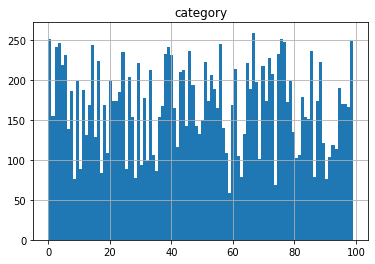

In [21]:
train_set.hist(bins=100)

In [0]:
train_set.set_index('name')
train_set['category'] = train_set['category'].astype(str)

In [0]:
categories = train_set.to_dict()
categories = categories[list(categories.keys())[0]]

In [0]:
from shutil import copyfile
from tqdm.auto import tqdm
def check_path(path):
    os.system("if [ ! -d " + path + " ]; then mkdir -p " + path + "; fi")
def make_cat(categories,train_path,output_path):
    check_path(output_path)
    for key in tqdm(categories.keys()):
        check_path(output_path+str(key))
        for pict_name in categories[key]:
            try:
                copyfile(train_path+pict_name, output_path+str(key)+"/"+pict_name)
            except Exception as e:
                print("Problem with ", train_path+pict_name)
                print(e)

In [25]:
train_df, validation_df = train_test_split(train_set, test_size=0.15)

print(f'train_df: {train_df.shape}')
print(f'validation_df: {validation_df.shape}')

train_df: (14328, 2)
validation_df: (2529, 2)


In [0]:
categories_train = train_df.groupby(['category'])['name'].apply(lambda grp: list(grp)).to_dict()
categories_val = validation_df.groupby(['category'])['name'].apply(lambda grp: list(grp)).to_dict()

In [0]:
train_path = "image_data/train/train/"
output_train_path = "image_data/new_train/"
output_val_path = "image_data/new_val/"

In [32]:
make_cat(categories_train,train_path,output_train_path)
make_cat(categories_val,train_path,output_val_path)

In [16]:
!pip install Augmentor

In [0]:
def img_array(path):
    image = img.open(path)
    tmp = np.array(image)
    image.close()
    return tmp
  
import Augmentor
from Augmentor import Pipeline

def augmentation(path, n):
    p = Augmentor.Pipeline(path) # ensure you press enter after this, don't just c&p this code.
    Pipeline.set_seed(100)
    p.rotate(probability=0.3, max_left_rotation=3, max_right_rotation=3)
    p.random_distortion(probability=0.9, grid_width=20, grid_height=20, magnitude=2)
    p.random_erasing(probability=0.5, rectangle_area=0.2)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
    p.sample(n)

path = output_train_path

for i in range(100):
    augmentation(path+str(i)+'/', 400 - len(categories_train[str(i)]))

In [31]:
train_datagen = ImageDataGenerator(
    rescale = 1./255)

validation_datagen = ImageDataGenerator(
    rescale = 1./255)
'''
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=15,
    height_shift_range=0.1,
    width_shift_range=0.1,
    shear_range=0.01,
    zoom_range=[0.9, 1.2],
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='reflect')

validation_datagen = ImageDataGenerator(
    rescale = 1./255)
  '''

"\ntrain_datagen = ImageDataGenerator(\n    rescale = 1./255,\n    rotation_range=15,\n    height_shift_range=0.1,\n    width_shift_range=0.1,\n    shear_range=0.01,\n    zoom_range=[0.9, 1.2],\n    brightness_range=[0.5, 1.5],\n    horizontal_flip=True,\n    vertical_flip=False,\n    fill_mode='reflect')\n\nvalidation_datagen = ImageDataGenerator(\n    rescale = 1./255)\n  "

In [59]:
train_generator = train_datagen.flow_from_directory(
        directory=output_train_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        directory=output_val_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')
'''
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=TRAIN_DIR,
        x_col='name',
        y_col='category',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory=TRAIN_DIR,
        x_col='name',
        y_col='category',
        target_size=(256, 256),
        batch_size=32,
        class_mode='categorical')
'''

Found 38548 images belonging to 100 classes.
Found 2529 images belonging to 100 classes.


"\ntrain_generator = train_datagen.flow_from_dataframe(\n        dataframe=train_df,\n        directory=TRAIN_DIR,\n        x_col='name',\n        y_col='category',\n        target_size=(256, 256),\n        batch_size=32,\n        class_mode='categorical')\n\nvalidation_generator = validation_datagen.flow_from_dataframe(\n        dataframe=validation_df,\n        directory=TRAIN_DIR,\n        x_col='name',\n        y_col='category',\n        target_size=(256, 256),\n        batch_size=32,\n        class_mode='categorical')\n"

## InceptionResNetV2

In [60]:
import tensorflow as tf

input_shape = (256,256,3)
batch_size = 128
n_classes = 100

# Set up model
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=input_shape))
x = base_model.output
x = AveragePooling2D(pool_size=(6, 6))(x)
x = Dropout(.4)(x)
x = Flatten()(x)
predictions = Dense(100, init='glorot_uniform', W_regularizer=l2(.0005), activation='softmax')(x)
model = Model(input=base_model.input, output=predictions)
# Display model
model.summary()

# Show if GPU is avialable
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="softmax", kernel_initializer="glorot_uniform", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_407 (Conv2D)             (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_407 (BatchN (None, 127, 127, 32) 96          conv2d_407[0][0]                 
__________________________________________________________________________________________________
activation_407 (Activation)     (None, 127, 127, 32) 0           batch_normalization_407[0][0]    
____________________________________________________________________________________________

In [0]:
for layer in model.layers[:400]:
    layer.trainable=False
for layer in model.layers[400:]:
    layer.trainable=True

In [0]:
# Initaite mode, specify the optimizer, lossfunction and metrics
opt = SGD(lr=.01, momentum=.9)

model.compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

# Save weights if model improved
filepath = "new_weights_{epoch:02d}_{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=2, save_best_only=True, mode='max')

# Early stopping in case val_loss < min_delta for a specific number of runs 
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.03, patience=5, verbose=1, mode='auto', baseline=None, restore_best_weights=False)

# Set callbacks 
callbacks_list = [checkpoint, early_stopping]

# same model as whole
model.save("Inception_transfer_10epocs.h5")

In [75]:
# Fit data & train model
model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        callbacks = callbacks_list,
        epochs = 1,
        verbose = 1,
        validation_data = validation_generator,
        validation_steps = validation_generator.samples // batch_size)

Epoch 1/1
301/301 [==============================] - 479s 2s/step - loss: 0.3346 - acc: 0.9433 - val_loss: 1.8133 - val_acc: 0.6086


KeyError: ignored

In [0]:
# same model as whole
model.save("InceptionResNetV2_transfer_4_6398.h5")

In [0]:
model = load_model('Inception_transfer_4_full_6464.h5')

In [0]:
!ls

In [0]:
for layer in model.layers:##[:311]: #101, 133, 165, 197, 249
    print(layer.trainable)

## Cosine

In [0]:
from PIL import Image
train_names = train_df['name'].tolist()
##train_arr = np.array([np.array(Image.open('/kaggle/input/evohackaton/train/train/'+iname)) for iname in train_names])

In [0]:
validation_names = validation_df['name'].tolist()
##validation_arr = np.array([np.array(Image.open(iname)) for iname in validation_names])

In [0]:
'''
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine
similar = []
for i in range(len(validation_names)):
    similar.append([])
    for j in range(len(train_names)):
        similar[i].append(cosine(np.array(Image.open('/kaggle/input/evohackaton/test/test/'+validation_names[i])).flatten(),np.array(Image.open('/kaggle/input/evohackaton/train/train/'+train_names[j])).flatten()))
##similar = cosine_similarity(validation_arr,train_arr)
train_classes = train_df['category'].tolist()
knearest = []
for newimg in similar:
    kthese = newimg.argsort()[-10:][::-1]
    kclasses = np.array([train_classes[i] for i in kthese])
    knearest.append(np.argmax(kclasses.bincount())) ##k=10\
'''

ValueError: operands could not be broadcast together with shapes (1987200,) (3535200,) 

In [0]:
filenames = [filename[9:] for filename in test_generator.filenames]
predictions = [str(k) for k in knearest]

submission = pd.DataFrame({'name':filenames,'category':predictions})
submission.to_csv('submission.csv', index=False)

## Test

In [0]:
 ##model = load_model('/kaggle/working/Inception_transfer_10_epocs_freeze250.h5')

In [78]:
test_datagen = ImageDataGenerator(
    rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
        'test/',
        target_size=(256, 256),
        shuffle = False,
        class_mode=None,
        batch_size=1)

Found 0 images belonging to 1 classes.


In [0]:
# Get the filenames & remove directory specification in front of filename
filenames = [filename[9:] for filename in test_generator.filenames]

# Not predicting in batches but each inidividual item, therefore we need to know the amount of predictions
nb_samples = len(filenames)

# Make predictions, returns probabilities for each class
print(f'Making predictions....')
predictions = model.predict_generator(test_generator,steps = nb_samples, verbose=1)

# Assign prediction to class with highest probability
y_pred_labels = np.argmax(predictions, axis = 1)

# Map predictions to the correct labels
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred_labels]

# Submit file
submission = pd.DataFrame({'name':filenames,'category':predictions})
submission.to_csv('submission.csv', index=False)